In [18]:
from keras.datasets import reuters

In [19]:
(train_data,train_label),(test_data,test_label) = reuters.load_data(num_words = 50000)

In [20]:
print("the size of training data is {} and test data is {}".format(len(train_data),len(test_data)))

the size of training data is 8982 and test data is 2246


In [21]:
#training data is a list of tokenized integers ie each integer represents a word's token
train_data_0_indices = ""
for i in train_data[0]:
    train_data_0_indices += (str(i) + " ")
print(train_data_0_indices)

1 27595 28842 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12 


In [22]:
#this will be a dictionary of words-token
word_index = reuters.get_word_index()
index_word = dict()
for key,value in word_index.items():
    index_word.update({value:key})

In [23]:
def convert_token_to_word(arr_of_ints):
    text = ""
    for tkn in arr_of_ints:
        text+=index_word[tkn]
        text+=" "
    return text
convert_token_to_word(test_data[0])

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and willingly exports 3 purchased each it stubbornly profit 3 avondale profit agreement in around corp should for 3 cannot mln in ended said avondale a 54 but 3 stubbornly a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 iffezheim uobm said president amount pct dlrs '

In [34]:
#one hot encoding the input data
import numpy as np
def one_hot_encode(inputSeq):
    tensr = np.zeros((len(inputSeq),50000),dtype = int)
    #rows = no of news articles(batch-size) and columns include the 
    #one-hot-encoding of the words in a review
    for i,seq in enumerate(inputSeq):
        tensr[i,seq] = 1
    return tensr
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)
print("X train shape " + str(x_train.shape))

X train shape (8982, 50000)


In [35]:
#one hot encoding labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [36]:
#16 hidden units maybe bottleneck to relevant information hence we will use 64 units
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation = "relu",input_shape = (50000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation = "softmax"))#hence output will be a 46 dimensional vector


In [37]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [38]:
x_validation = x_train[:1000]
y_validation = y_train[:1000]
partial_xtrain = x_train[1000:]
print(partial_xtrain.shape)
partial_ytrain = y_train[1000:]
print(partial_ytrain.shape)

(7982, 50000)
(7982, 46)


In [39]:
history = model.fit(partial_xtrain,partial_ytrain,epochs = 20,batch_size=512,validation_data=(x_validation,y_validation))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 785us/step - loss: 3.3915 - acc: 0.4297 - val_loss: 2.6589 - val_acc: 0.5380
Epoch 2/20
7982/7982 [==============================] - 5s 667us/step - loss: 2.0591 - acc: 0.5779 - val_loss: 1.6543 - val_acc: 0.6270
Epoch 3/20
7982/7982 [==============================] - 5s 603us/step - loss: 1.3866 - acc: 0.6954 - val_loss: 1.3393 - val_acc: 0.6990
Epoch 4/20
7982/7982 [==============================] - 5s 661us/step - loss: 1.0528 - acc: 0.7671 - val_loss: 1.1713 - val_acc: 0.7400
Epoch 5/20
7982/7982 [==============================] - 5s 641us/step - loss: 0.8005 - acc: 0.8208 - val_loss: 1.0620 - val_acc: 0.7720
Epoch 6/20
7982/7982 [==============================] - 5s 609us/step - loss: 0.5910 - acc: 0.8636 - val_loss: 0.9938 - val_acc: 0.7910
Epoch 7/20
7982/7982 [==============================] - 5s 639us/step - loss: 0.4261 - acc: 0.9039 - val_loss: 0.9697 - val_acc: 0.8050


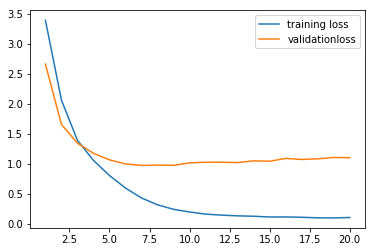

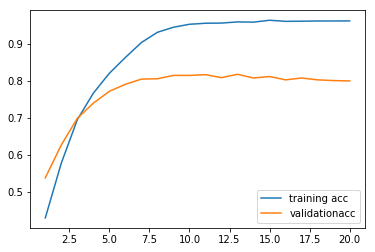

In [40]:
import matplotlib.pyplot as plt
history_dict = history.history
def plotting(epochs,y1,y2,data):
    x = [i for i in range(1,epochs+1)]
    plt.plot(x,y1,label = "training {}".format(data))
    plt.plot(x,y2,label = "validation{}".format(data))
    plt.legend()
    plt.show()

plotting(20,[x for x in history_dict["loss"]],[x for x in history_dict["val_loss"]],"loss")
plotting(20,history_dict["acc"],history_dict["val_acc"],"acc")
    

In [41]:
convert_token_to_word(test_data[0])

'the in wants intermediate 3 how types could mln at against 2 guidelines vs end products opec he will will along results and willingly exports 3 purchased each it stubbornly profit 3 avondale profit agreement in around corp should for 3 cannot mln in ended said avondale a 54 but 3 stubbornly a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 iffezheim uobm said president amount pct dlrs '

In [42]:
pred = model.predict(x_test)

In [46]:
train_label[0]

3

In [47]:
def custom_news(article):
    article_arr = article.split(" ")
    int_article = [[word_index[x] for x in article_arr]]
    custom_test = one_hot_encode(int_article)
    return np.argmax(model.predict(custom_test)[0])
custom_news("cocoa cake")

3